<a href="https://colab.research.google.com/github/kiran74-ds/algorithmic_trading/blob/main/Stock_data__27_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.dropbox.com/s/hqggr8gz4blmxa5/EQUITY.zip
!unzip EQUITY.zip

--2020-12-28 13:12:26--  https://www.dropbox.com/s/hqggr8gz4blmxa5/EQUITY.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hqggr8gz4blmxa5/EQUITY.zip [following]
--2020-12-28 13:12:26--  https://www.dropbox.com/s/raw/hqggr8gz4blmxa5/EQUITY.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucedc4bd2e7bdc9e5b5ea8422804.dl.dropboxusercontent.com/cd/0/inline/BF6KniO-qRAykFFMXdNgXanbue_CIlsZz5eI07rozMvWKM1J4Ze5mHz9w8Wo1puyq3VUBs4dAqAlECeUp2nNTrONLwMN3HySr3g3aZmV8CCLKdYrTuAIuUjzCzVQulKxnUY/file# [following]
--2020-12-28 13:12:26--  https://ucedc4bd2e7bdc9e5b5ea8422804.dl.dropboxusercontent.com/cd/0/inline/BF6KniO-qRAykFFMXdNgXanbue_CIlsZz5eI07rozMvWKM1J4Ze5mHz9w8Wo1puyq3VUBs4dAqAlECeUp2nNTrONLwMN3HySr3g3aZmV8CCLKdYrTuAIu

In [2]:
!pip install torch_snippets
from torch_snippets import *
files = Glob('/content/3minute/*')
df = pd.read_excel(files[0])

     |████████████████████████████████| 61kB 5.7MB/s 
     |████████████████████████████████| 102kB 8.5MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7667 sha256=a21df25c8fa4de9230ef7fff3dcddac445abb813b3f497463b47d1c5ade1d723
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built contextvars


2020-12-28 13:12:44.682 | INFO     | torch_snippets.loader:Glob:201 - 194 files found at /content/3minute/*


In [3]:
import pandas as pd 

In [4]:
def get_df(company_list):
  lines = pd.DataFrame()
  if(type(company_list)==str):
    company_list = [company_list]
  for j in company_list:
    path = '3minute/'+j+'_3minute.xlsx'
    df = pd.read_excel(path)
    df['company'] = j
    lines = pd.concat([lines,df],axis=0)
  return lines

In [5]:
from torch_snippets import *


In [6]:
companies_paths = Glob('3minute/*')
companies_names = [name[8:].split('_')[0] for name in companies_paths]
companies_names[:3]

2020-12-28 13:12:45.247 | INFO     | torch_snippets.loader:Glob:201 - 194 files found at 3minute/*


['APOLLOHOSP', 'AUROPHARMA', 'EICHERMOT']

In [7]:
!pip install pandas_datareader
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [8]:
#Read Stock Data from Yahoo Finance
end = dt.datetime.now()
#start = dt.datetime(end.year-2, end.month, end.day)
start = dt.datetime(2017, 1, 1)
df = web.DataReader('AMBUJACEM.NS', 'yahoo', start, end)
df['company'] = 'AMBUJA'

In [9]:
for name in companies_names:
  print(name)
  try:
    t = web.DataReader(name+'.NS', 'yahoo', start, end)
    t['company'] = name
    df = pd.concat([df,t])
  except:
    pass

APOLLOHOSP
AUROPHARMA
EICHERMOT
TATAMTRDVR
BPCL
BHARATFORG
BANKBARODA
KAJARIACER
GODFRYPHLP
RELCAPITAL
WIPRO
CANFINHOME
BAJFINANCE
TATAPOWER
ESCORTS
AJANTPHARM
IDBI
BSOFT
ICICIPRULI
BALKRISIND
RPOWER
MRPL
TITAN
HINDZINC
MRF
KOTAKBANK
NTPC
MCDOWELL-N
AXISBANK
KSCL
INDIGO
ORIENTBANK
INFY
BERGEPAINT
BEL
RELIANCE
IFCI
HEROMOTOCO
APOLLOTYRE
NESTLEIND
BRITANNIA
DIVISLAB
VEDL
IDFC
POWERGRID
INDUSINDBK
ADANIENT
NMDC
PCJEWELLER
MGL
GODREJCP
SYNDIBANK
ULTRACEMCO
YESBANK
TATACOMM
NIITTECH
JISLJALEQS
SIEMENS
MOTHERSUMI
CGPOWER
TATAMOTORS
UPL
IDEA
FEDERALBNK
ADANIPOWER
BAJAJFINSV
ZEEL
CONCOR
LICHSGFIN
HINDALCO
SOUTHBANK
PVR
TECHM
SUNPHARMA
TATAGLOBAL
PNB
RBLBANK
HDFC
PAGEIND
DLF
ARVIND
SRF
INFIBEAM
COLPAL
MANAPPURAM
TATACHEM
RELINFRA
ITC
STAR
INFRATEL
SRTRANSFIN
PEL
RECLTD
HEXAWARE
CANBK
NCC
DABUR
ENGINERSIN
KTKBANK
IRB
GAIL
L&TFH
CIPLA
HCLTECH
BOSCHLTD
JSWSTEEL
IGL
ASIANPAINT
OIL
ALBK
CHOLAFIN
TV18BRDCST
ICICIBANK
IBULHSGFIN
CASTROLIND
IDFCFIRSTB
MUTHOOTFIN
PETRONET
WOCKPHARMA
TORNTPHARM
LUPIN
BEM

In [10]:
df.shape

(185754, 7)

In [11]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,company
0,2017-01-02,215.449997,209.000000,209.000000,214.600006,1715063.0,190.301926,AMBUJA
1,2017-01-03,216.850006,214.000000,215.000000,215.199997,1544119.0,190.834000,AMBUJA
2,2017-01-04,218.199997,211.250000,215.699997,212.149994,2063229.0,188.129303,AMBUJA
3,2017-01-05,214.850006,210.899994,213.100006,214.350006,1267500.0,190.080246,AMBUJA
4,2017-01-06,215.449997,212.000000,214.699997,212.600006,836675.0,188.528381,AMBUJA


In [12]:
df.columns = ['date','high','low','open','close','volume','adj_close','company']

In [13]:
lines = get_df(choose(companies_names,190))
#lines = get_df('POWERGRID')
lines.shape
all_companies = list(lines['company'].unique())
lines['company_codes'] = pd.Categorical(lines.company).codes
lines['MA30'] = lines['close'].rolling(window=30).mean()
lines['MA100'] = lines['close'].rolling(window=100).mean()
# lines = lines.head(2500)
# lines = lines.tail(2400).reset_index(drop='index')

In [14]:
lines2 = df[['date','close','company']]
t = pd.pivot_table(lines2, values='close', index='date', columns='company').reset_index()
t.index.rename('index')
t.head()

company,date,ACC,ADANIENT,ADANIPORTS,ADANIPOWER,AJANTPHARM,AMARAJABAT,AMBUJA,AMBUJACEM,APOLLOHOSP,APOLLOTYRE,ARVIND,ASHOKLEY,ASIANPAINT,AUROPHARMA,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BALKRISIND,BANKBARODA,BANKINDIA,BATAINDIA,BEL,BEML,BERGEPAINT,BHARATFORG,BHARTIARTL,BHEL,BIOCON,BOSCHLTD,BPCL,BRITANNIA,BSOFT,CADILAHC,CANBK,CANFINHOME,CASTROLIND,CEATLTD,CENTURYTEX,...,RELINFRA,REPCOHOME,RPOWER,SAIL,SBIN,SHREECEM,SIEMENS,SOUTHBANK,SRF,SRTRANSFIN,STAR,SUNPHARMA,SUNTV,SUZLON,TATACHEM,TATACOMM,TATAELXSI,TATAMOTORS,TATAMTRDVR,TATAPOWER,TATASTEEL,TCS,TECHM,TITAN,TORNTPHARM,TORNTPOWER,TV18BRDCST,TVSMOTOR,UBL,UJJIVAN,ULTRACEMCO,UNIONBANK,UPL,VEDL,VGUARD,VOLTAS,WIPRO,WOCKPHARMA,YESBANK,ZEEL
0,2017-01-02,1351.900024,41.930099,273.799988,30.600000,1823.849976,896.599976,214.600006,214.600006,1189.199951,185.850006,133.389999,81.000000,904.650024,675.500000,447.750000,2598.500000,2949.649902,870.049988,543.775024,148.899994,107.449997,447.149994,124.136002,996.299988,211.550003,462.250000,285.553009,81.666702,158.658005,21096.099609,427.000000,1443.219971,84.231102,354.500000,255.272995,330.100006,192.750000,1180.150024,816.099976,...,478.700012,564.900024,41.900002,50.500000,243.600006,14517.599609,1120.000000,17.787399,1558.400024,884.400024,996.244019,634.049988,501.600006,14.05,223.513000,629.250000,706.375000,487.049988,308.549988,75.400002,387.526001,1180.680054,488.000000,333.950012,1310.750000,177.949997,36.849998,367.649994,775.049988,331.850006,3371.350098,125.550003,439.100006,220.949997,116.607002,328.399994,176.830994,666.400024,228.929993,451.600006
1,2017-01-03,1343.550049,41.712200,273.950012,30.650000,1797.349976,889.700012,215.199997,215.199997,1205.449951,187.250000,136.457993,81.050003,896.599976,672.200012,455.250000,2619.199951,3016.649902,884.000000,548.525024,148.600006,108.349998,463.149994,129.376999,1009.299988,213.449997,461.049988,279.539001,83.199997,157.550003,20798.599609,433.700012,1436.119995,84.262199,354.799988,257.558990,331.570007,192.850006,1193.500000,839.500000,...,478.399994,567.299988,41.950001,51.650002,244.899994,14128.500000,1108.500000,18.013700,1550.199951,892.950012,977.642029,636.099976,523.549988,14.25,224.746994,625.650024,701.174988,481.100006,308.399994,75.650002,384.239014,1184.119995,491.549988,348.149994,1339.449951,178.149994,37.250000,377.399994,787.450012,329.899994,3326.699951,126.250000,436.666992,219.649994,116.963997,332.700012,175.125000,666.349976,232.580002,458.299988
2,2017-01-04,1319.400024,42.393299,274.899994,31.650000,1779.750000,900.299988,212.149994,212.149994,1220.949951,185.300003,135.889999,83.849998,906.599976,666.950012,453.100006,2684.100098,2960.850098,871.900024,545.150024,148.000000,107.699997,463.350006,130.199997,1005.799988,214.649994,456.875000,288.216003,84.733299,155.649994,20336.800781,436.967010,1426.199951,85.256798,362.049988,256.683990,333.890015,193.024994,1180.400024,826.250000,...,483.000000,576.950012,42.450001,50.549999,242.899994,14122.599609,1121.949951,18.104200,1549.449951,911.799988,1000.950012,637.349976,523.900024,14.95,222.697006,625.700012,709.650024,486.649994,310.250000,75.800003,386.286987,1189.750000,500.600006,359.649994,1349.650024,179.000000,37.450001,375.250000,797.500000,331.399994,3301.399902,125.550003,445.032990,216.800003,117.536003,335.799988,178.350006,665.599976,232.630005,458.600006
3,2017-01-05,1332.849976,43.128899,287.500000,32.599998,1789.250000,920.500000,214.350006,214.350006,1207.250000,187.699997,138.522995,83.949997,916.500000,686.250000,458.049988,2723.350098,3018.449951,899.750000,551.275024,150.949997,109.550003,470.399994,130.158997,1001.599976,213.949997,461.174988,294.826996,85.300003,157.699997,20903.800781,448.467010,1432.900024,85.536598,367.100006,259.066986,337.839996,195.750000,1192.400024,836.849976,...,490.700012,595.000000,43.299999,51.950001,245.350006,14156.900391,1141.650024,18.466299,1584.500000,914.849976,1020.809998,643.450012,532.250000,15.15,224.042007,637.450012,716.549988,502.14

In [15]:
t.shape

(983, 190)

In [16]:
t_new = t.copy()
for company in t_new.columns[1:]:
  t_new[company] = t_new[company]/t_new.loc[0,company]

In [17]:
t0 = t.iloc[0:500].copy().reset_index(drop='index')
for company in t0.columns[1:]:
  t0[company] = t0[company]/t0.loc[0,company]

In [18]:
req_cols = ['date']+list(t0.columns[1:][t0.tail(1).iloc[0,1:].values>1])

In [19]:
t0 = t0[req_cols]
t0.head(),t0.shape

(company       date       ACC  ADANIENT  ...    VOLTAS     WIPRO      ZEEL
 0       2017-01-02  1.000000  1.000000  ...  1.000000  1.000000  1.000000
 1       2017-01-03  0.993824  0.994803  ...  1.013094  0.990352  1.014836
 2       2017-01-04  0.975960  1.011047  ...  1.022533  1.008590  1.015500
 3       2017-01-05  0.985909  1.028590  ...  1.048873  1.018769  1.042294
 4       2017-01-06  0.986685  1.022094  ...  1.024513  0.996607  1.025465
 
 [5 rows x 120 columns], (500, 120))

In [20]:
t2 = t0.iloc[:,1:].corr()

In [21]:
t3 = t2.stack().rename_axis(['original','match']).reset_index()
#t4 = t3[t3['original']!=t3['match']].reset_index(drop='index')
t3.head()

,original,match,0
0,ACC,ACC,1.000000
1,ACC,ADANIENT,-0.086801
2,ACC,ADANIPORTS,0.624355
3,ACC,ADANIPOWER,0.113936
4,ACC,AMBUJA,0.926214


In [22]:
t3.columns =['original','match','correlation']

In [23]:
t4 = pd.pivot_table(t3,values='correlation',index='original',columns='match')
t4 = t4.where(np.triu(np.ones(t4.shape)).astype(np.bool))

In [24]:
t5 = t4.stack().reset_index()
t5.columns =['original','match','correlation']
t5 = t5[t5['original']!=t5['match']].reset_index(drop='index')
t5 = t5.sort_values(by=['original','correlation'],ascending=[False,False])

In [25]:
t6 = t5.groupby('original').first().reset_index()

In [26]:
t6 = t6[(t6['correlation']<0.9) & (t6['correlation']>0.6)].reset_index(drop='index').sort_values(by='correlation',ascending=False)
print(t6.shape)
t6.head(5)

(70, 3)


,original,match,correlation
49,RAYMOND,VGUARD,0.899607
6,BALKRISIND,TITAN,0.898184
51,RELIANCE,UBL,0.897964
27,IGL,TATASTEEL,0.896890
2,AMBUJACEM,MGL,0.896863


In [27]:
def percent_change(stock):
  previous = stock.shift(1)
  pct_change = ((stock - previous) / previous) * 100
  return pct_change.fillna(0)

In [28]:
def calc_profit(stock1, stock2, max_inv = 5):
  stock1_pct_chg = percent_change(stock1)
  stock2_pct_chg = percent_change(stock2)
  stocks_diff = stock1_pct_chg - stock2_pct_chg
  stock1_shares = []
  stock2_shares = []
  # Buy Stock2 Sell Stock1
  stock1_pos_indicators = stocks_diff[stocks_diff>3].index.values
  # Buy Stock1 Sell Stock2
  stock2_pos_indicators = stocks_diff[stocks_diff<-3].index.values
  stock1_df = pd.DataFrame(stock1_pos_indicators)
  stock1_df['company'] = 'stock2'
  stock1_df.columns = ['index', 'company']
  stock1_df

  stock2_df = pd.DataFrame(stock2_pos_indicators)
  stock2_df['company'] = 'stock1'
  stock2_df.columns = ['index', 'company']
  stock2_df

  stock_indicators = pd.concat([stock1_df, stock2_df])
  stock_indicators = stock_indicators.sort_values(by='index').reset_index(drop='index')
  stock1_bought = []
  stock2_bought = []
  stock2_sold = []
  stock1_sold = []
  profit_final = 0
  total_invested = 0
  for i in range(stock_indicators.shape[0]):
    if((stock_indicators.iloc[i]['company']=='stock1') & (len(stock1_bought)<=10)):  
      if(sum(stock1_bought+stock2_bought)<max_inv):    
        stock1_bought.append(stock1[stock1.index == stock_indicators.iloc[i]['index']].values[0])
        #print('stock1 bought: ', stock1_bought)
      if(len(stock2_bought)>0):
        #print('stock2 sold: ',stock2_sold)
        stock2_sold.append(stock2[stock2.index == stock_indicators.iloc[i]['index']].values[0])
        sell_price = stock2[stock2.index == stock_indicators.iloc[i]['index']].values[0]
        profit = len(stock2_bought)*sell_price - sum(stock2_bought)
        stock2_bought = []      
        #print('stock2 sold: ',stock2_sold)    
        #print('profit: ',profit)  
        profit_final+=(profit-0.005)
          #stock2_sold.pop()
    if((stock_indicators.iloc[i]['company']=='stock2') & (len(stock2_bought)<=10)):
      if(sum(stock1_bought+stock2_bought)<max_inv):
        stock2_bought.append(stock2[stock2.index == stock_indicators.iloc[i]['index']].values[0])
        #print('stock2 bought: ',stock2_bought)
      if(len(stock1_bought)>0):      
        stock1_sold.append(stock1[stock1.index == stock_indicators.iloc[i]['index']].values[0])
        sell_price = stock1[stock1.index == stock_indicators.iloc[i]['index']].values[0]
        profit = len(stock1_bought)*sell_price - sum(stock1_bought)
        stock1_bought = []
        
        #print('stock1 sold: ',stock1_sold)
        #print('profit: ',profit)
        profit_final+=(profit-0.005)

    if len(stock1_bought)>0:
      sell_price_stock1 = stock1.iloc[-1]
      profit = sell_price_stock1*len(stock1_bought) - sum(stock1_bought)
      profit_final+=(profit-0.005)
    if len(stock2_bought)>0:
      sell_price_stock2 = stock2.iloc[-1]
      profit = sell_price_stock2*len(stock2_bought) - sum(stock2_bought)
      profit_final+=(profit-0.005)
        #stock1_sold.pop()
  return profit_final, sum(stock1_bought+stock2_bought)


In [88]:
def get_stock_indicators(stock1, stock2, thres, company1, company2):
  stock1_pct_chg = percent_change(stock1)
  stock2_pct_chg = percent_change(stock2)
  stocks_diff = stock1_pct_chg - stock2_pct_chg
  stock1_shares = []
  stock2_shares = []
  # Buy Stock2 Sell Stock1
  stock1_pos_indicators = stocks_diff[stocks_diff>thres].index.values
  # Buy Stock1 Sell Stock2
  stock2_pos_indicators = stocks_diff[stocks_diff<-thres].index.values
  #stock1_df = pd.DataFrame(stock1_pos_indicators)
  stock1_buy = pd.DataFrame(stocks_diff[stocks_diff>thres]).reset_index()
  stock1_buy.columns = ['index', 'value']
  stock1_buy['company'] = company2
  stock1_buy['indicator'] = 'buy'

  stock1_sell = pd.DataFrame(stocks_diff[stocks_diff>thres]).reset_index()
  stock1_sell.columns = ['index', 'value']
  stock1_sell['company'] = company1
  stock1_sell['indicator'] = 'sell'
  stock1_df = stock1_buy.append(stock1_sell)

  #stock2_df = pd.DataFrame(stock2_pos_indicators)
  stock2_buy = pd.DataFrame(stocks_diff[stocks_diff<-thres]).reset_index()
  stock2_buy.columns = ['index', 'value']
  stock2_buy['company'] = company1
  stock2_buy['indicator'] = 'buy'
  
  

  stock2_sell = pd.DataFrame(stocks_diff[stocks_diff<-thres]).reset_index()
  stock2_sell.columns = ['index', 'value']
  stock2_sell['company'] = company2
  stock2_sell['indicator'] = 'sell'
  stock2_df = stock2_buy.append(stock2_sell)

  stock_indicators = pd.concat([stock1_df, stock2_df])
  stock_indicators = stock_indicators.sort_values(by='index').reset_index(drop='index')
  return stock_indicators

In [89]:
ix = 8 
stock1 = t_new[t6.iloc[ix]['original']][500:700]
stock2 = t_new[t6.iloc[ix]['match']][500:700]
company1 = t6.iloc[ix]['original']
company2 = t6.iloc[ix]['match']
stock_indicators = get_stock_indicators(stock1, stock2, 5, company1, company2)
stock_indicators

,index,value,company,indicator
0,636,-6.140774,AXISBANK,buy
1,636,-6.140774,HAVELLS,sell
2,669,-6.200708,AXISBANK,buy
3,669,-6.200708,HAVELLS,sell
4,670,6.093457,HAVELLS,buy
5,670,6.093457,AXISBANK,sell
6,671,-6.380182,AXISBANK,buy
7,671,-6.380182,HAVELLS,sell
8,679,5.019468,HAVELLS,buy
9,679,5.019468,AXISBANK,sell


In [91]:
stock_info = lines2.copy()
stock_info.head(2)

,date,close,company
0,2017-01-02,214.600006,AMBUJA
1,2017-01-03,215.199997,AMBUJA


In [102]:
stock_company = pd.DataFrame()
for company in stock_info['company'].unique():
  df = stock_info[stock_info['company']==company].reset_index(drop='index').reset_index()
  stock_company = stock_company.append(df)

In [107]:
# stock_final = pd.merge(stock_company, stock_indicators,  how='left', left_on=['index', 'company'], right_on = ['index', 'company'])
# stock_final

In [108]:
stock_final = pd.DataFrame()
for ix in range(t6.shape[0]):
  if(abs(t_new[t6.iloc[ix]['original']][200:400].mean() - t_new[t6.iloc[ix]['match']][200:400].mean())<0.2) and (t[t6.iloc[ix]['original']][0]<=2000 and t[t6.iloc[ix]['match']][0]<=2000):
    t_new.fillna(1,inplace=True)
    stock1 = t_new[t6.iloc[ix]['original']][500:700]
    stock2 = t_new[t6.iloc[ix]['match']][500:700]
    company1 = t6.iloc[ix]['original']
    company2 = t6.iloc[ix]['match']
    stock_indicators = get_stock_indicators(stock1, stock2, 5, company1, company2)
    df = pd.merge(stock_company, stock_indicators,  how='left', left_on=['index', 'company'], right_on = ['index', 'company'])
    stock_final = stock_final.append(df)


In [109]:
tradable_stocks = stock_final[~stock_final['indicator'].isnull()]

In [111]:
ix = 0 
t6.iloc[ix]['original'], t6.iloc[ix]['match']

('RAYMOND', 'VGUARD')

In [112]:
tradable_stocks[tradable_stocks.company.isin(['RAYMOND', 'VGUARD'])]

,index,date,close,company,value,indicator
143023,521,2019-02-07,653.700012,RAYMOND,-8.806516,buy
143024,522,2019-02-08,687.549988,RAYMOND,5.256334,sell
143027,525,2019-02-14,704.549988,RAYMOND,5.819428,sell
143077,575,2019-05-06,806.049988,RAYMOND,7.475024,sell
143096,594,2019-05-31,828.000000,RAYMOND,-5.462688,buy
143108,606,2019-06-19,740.799988,RAYMOND,-5.349092,buy
143109,607,2019-06-20,762.650024,RAYMOND,6.815169,sell
143110,608,2019-06-21,749.950012,RAYMOND,-6.806973,buy
143125,623,2019-07-12,711.400024,RAYMOND,-5.409066,buy
143149,647,2019-08-19,616.700012,RAYMOND,-6.442315,buy


In [ ]:
company. closeprice indicator.  Date
Hexaware 100.       Buy         April-14
Suzlon   20         Sell        May-15
------
----



In [31]:
import math

def calc_profit(stock1, stock2, thres = 5):
  stock_indicators = get_stock_indicators(stock1, stock2, thres)
  stock1_bought = []
  stock2_bought = []
  stock2_sold = []
  stock1_sold = []
  profit_final = 0
  
  stock1_org_val = t[t6.iloc[ix]['original']][0]
  stock2_org_val = t[t6.iloc[ix]['match']][0]

  total_investment = 10000
  num_of_transactions = stock_indicators.shape[0]
  min_thres_per_stock = total_investment / num_of_transactions
  max_inv = num_of_transactions

  max_stock1_shares = math.floor(min_thres_per_stock / stock1_org_val)
  max_stock2_shares = math.floor(min_thres_per_stock / stock2_org_val)

  max_stock1_shares, max_stock2_shares, min_thres_per_stock

  for i in range(stock_indicators.shape[0]):
    if((stock_indicators.iloc[i]['company']=='stock1') & (len(stock1_bought)<=10)):  
      if(sum(stock1_bought+stock2_bought)<max_inv):
        for _ in range(max_stock1_shares):    
          stock1_bought.append(stock1[stock1.index == stock_indicators.iloc[i]['index']].values[0])
        #print('stock1 bought: ', stock1_bought)
      if(len(stock2_bought)>0):
        #print('stock2 sold: ',stock2_sold)
        stock2_sold.append(stock2[stock2.index == stock_indicators.iloc[i]['index']].values[0])
        sell_price = stock2[stock2.index == stock_indicators.iloc[i]['index']].values[0]
        profit = len(stock2_bought)*sell_price - sum(stock2_bought)
        stock2_bought = []      
        #print('stock2 sold: ',stock2_sold)    
        #print('profit: ',profit)  
        profit_final+=(profit-0.005)
          #stock2_sold.pop()
    if((stock_indicators.iloc[i]['company']=='stock2') & (len(stock2_bought)<=10)):
      if(sum(stock1_bought+stock2_bought)<max_inv):
        for _ in range(max_stock2_shares):
          stock2_bought.append(stock2[stock2.index == stock_indicators.iloc[i]['index']].values[0])
        #print('stock2 bought: ',stock2_bought)
      if(len(stock1_bought)>0):      
        stock1_sold.append(stock1[stock1.index == stock_indicators.iloc[i]['index']].values[0])
        sell_price = stock1[stock1.index == stock_indicators.iloc[i]['index']].values[0]
        profit = len(stock1_bought)*sell_price - sum(stock1_bought)
        stock1_bought = []
        
        #print('stock1 sold: ',stock1_sold)
        #print('profit: ',profit)
        profit_final+=(profit-0.005)

    if len(stock1_bought)>0:
      sell_price_stock1 = stock1.iloc[-1]
      profit = sell_price_stock1*len(stock1_bought) - sum(stock1_bought)
      profit_final+=(profit-0.005)
    if len(stock2_bought)>0:
      sell_price_stock2 = stock2.iloc[-1]
      profit = sell_price_stock2*len(stock2_bought) - sum(stock2_bought)
      profit_final+=(profit-0.005)
        #stock1_sold.pop()
  return profit_final, sum(stock1_bought+stock2_bought)


In [32]:
final_profits = []
final_bought = []
ix_final = []
for ix in range(t6.shape[0]):
  if(abs(t_new[t6.iloc[ix]['original']][200:400].mean() - t_new[t6.iloc[ix]['match']][200:400].mean())<0.2) and (t[t6.iloc[ix]['original']][0]<=2000 and t[t6.iloc[ix]['match']][0]<=2000):
    t_new.fillna(1,inplace=True)
    profits, boughts = calc_profit(t_new[t6.iloc[ix]['original']][500:700], t_new[t6.iloc[ix]['match']][500:700], thres = 5)
    final_profits.append(profits)
    final_bought.append(boughts)
    ix_final.append(ix)

In [33]:
sum(final_profits), sum(final_bought), len(final_bought)

(155.92661870585337, 222.09336433804756, 20)

In [ ]:
final_profits

In [ ]:
k=-1

In [ ]:
k+=1
ix = ix_final[k]
print(t6.iloc[ix]['match'], t6.iloc[ix]['original'])
calc_profit(t_new[t6.iloc[ix]['original']][550:600], t_new[t6.iloc[ix]['match']][550:600], max_inv = 5)

SRTRANSFIN MCDOWELL-N


(-0.28412172205635167, 2.6023857816523246)

In [98]:
#ix = 8
thres = 3
stock1 = t_new[t6.iloc[ix]['original']][550:600]
stock2 = t_new[t6.iloc[ix]['match']][550:600]
stock1_pct_chg = percent_change(stock1)
stock2_pct_chg = percent_change(stock2)
stocks_diff = stock1_pct_chg - stock2_pct_chg
stock1_shares = []
stock2_shares = []
# Buy Stock2 Sell Stock1
stock1_pos_indicators = stocks_diff[stocks_diff>thres].index.values
# Buy Stock1 Sell Stock2
stock2_pos_indicators = stocks_diff[stocks_diff<-thres].index.values
#stock1_df = pd.DataFrame(stock1_pos_indicators)
stock1_df = pd.DataFrame(stocks_diff[stocks_diff>thres]).reset_index()
stock1_df.columns = ['index', 'value']
stock1_df['company'] = 'stock2'
stock1_df

#stock2_df = pd.DataFrame(stock2_pos_indicators)
stock2_df = pd.DataFrame(stocks_diff[stocks_diff<-thres]).reset_index()
stock2_df.columns = ['index', 'value']
stock2_df['company'] = 'stock1'
stock2_df

stock_indicators = pd.concat([stock1_df, stock2_df])
stock_indicators = stock_indicators.sort_values(by='index').reset_index(drop='index')
stock1_pos_indicators, stock2_pos_indicators

(array([571, 589, 590]), array([554, 594]))

In [99]:
num_of_transactions

5

In [100]:
stock1_org_val = t[t6.iloc[ix]['original']][0]
stock2_org_val = t[t6.iloc[ix]['match']][0]

max_inv = 10000
num_of_transactions = stock_indicators.shape[0]
min_thres_per_stock = max_inv / num_of_transactions

import math
max_stock1_shares = math.floor(min_thres_per_stock / stock1_org_val)
max_stock2_shares = math.floor(min_thres_per_stock / stock2_org_val)

max_stock1_shares, max_stock2_shares, min_thres_per_stock

(4, 5, 2000.0)

In [102]:
stock1_bought = []
stock2_bought = []
stock2_sold = []
stock1_sold = []
profit_final = 0
max_inv = num_of_transactions


for i in range(stock_indicators.shape[0]):
  if((stock_indicators.iloc[i]['company']=='stock1') & (len(stock1_bought)<=max_stock1_shares)):  
    if(sum(stock1_bought+stock2_bought)<max_inv):    
      for _ in range(max_stock1_shares):
        stock1_bought.append(stock1[stock1.index == stock_indicators.iloc[i]['index']].values[0])
      print('stock1 bought: ', stock1_bought)
    if(len(stock2_bought)>0):
      print('stock2 sold: ',stock2_sold)
      stock2_sold.append(stock2[stock2.index == stock_indicators.iloc[i]['index']].values[0])
      sell_price = stock2[stock2.index == stock_indicators.iloc[i]['index']].values[0]
      profit = len(stock2_bought)*sell_price - sum(stock2_bought)
      stock2_bought = []      
      print('stock2 sold: ',stock2_sold)    
      print('profit: ',profit)  
      profit_final+=(profit-0.005)
        #stock2_sold.pop()
  if((stock_indicators.iloc[i]['company']=='stock2') & (len(stock2_bought)<=max_stock2_shares)):
    if(sum(stock1_bought+stock2_bought)<max_inv):
      for _ in range(max_stock2_shares):
        stock2_bought.append(stock2[stock2.index == stock_indicators.iloc[i]['index']].values[0])
      print('stock2 bought: ',stock2_bought)
    if(len(stock1_bought)>0): 
      stock1_sold.append(stock1[stock1.index == stock_indicators.iloc[i]['index']].values[0])
      sell_price = stock1[stock1.index == stock_indicators.iloc[i]['index']].values[0]
      profit = len(stock1_bought)*sell_price - sum(stock1_bought)
      stock1_bought = []
      
      print('stock1 sold: ',stock1_sold)
      print('profit: ',profit)
      profit_final+=(profit-0.005)

  if len(stock1_bought)>0:
    sell_price_stock1 = stock1.iloc[-1]
    profit = sell_price_stock1*len(stock1_bought) - sum(stock1_bought)
    profit_final+=(profit-0.005)
  if len(stock2_bought)>0:
    sell_price_stock2 = stock2.iloc[-1]
    profit = sell_price_stock2*len(stock2_bought) - sum(stock2_bought)
    profit_final+=(profit-0.005)
      #stock1_sold.pop()

stock1 bought:  [1.709882692542574, 1.709882692542574, 1.709882692542574, 1.709882692542574]
stock1 sold:  [1.697152483336823]
profit:  -0.0509208368230043
stock2 bought:  [2.1750767135215856, 2.1750767135215856, 2.1750767135215856, 2.1750767135215856, 2.1750767135215856]
stock2 sold:  []
stock2 sold:  [2.1879479270231297]
profit:  0.06435606750772038


In [93]:
max_stock1_shares

4

In [38]:
stocks_diff[stocks_diff>5]

570    5.331215
585    5.755625
dtype: float64

In [39]:
stocks_diff[stocks_diff<-5]

596   -5.00809
dtype: float64

In [40]:
stock_indicators

,index,company
0,570,stock2
1,585,stock2
0,596,stock1


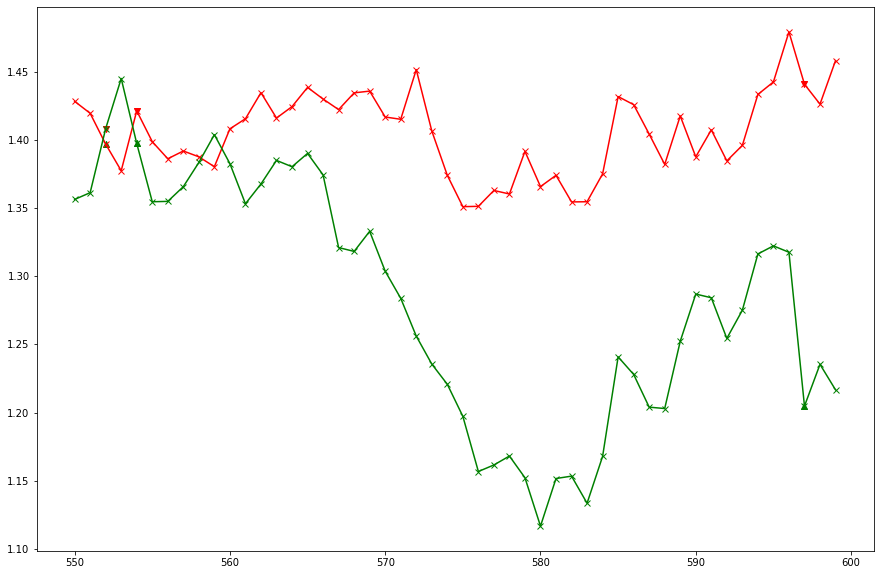

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(t_new[t6.iloc[ix]['original']][550:600], color = 'red',marker='x')
plt.plot(t_new[t6.iloc[ix]['match']][550:600], color = 'green',marker='x')
plt.scatter(stock1_pos_indicators, t_new.iloc[stock1_pos_indicators][t6.iloc[ix]['original']].values,label='Sell',marker='v',color='red')
plt.scatter(stock2_pos_indicators, t_new.iloc[stock2_pos_indicators][t6.iloc[ix]['match']].values,label='Sell',marker='v',color='red')
plt.scatter(stock2_pos_indicators, t_new.iloc[stock2_pos_indicators][t6.iloc[ix]['original']].values,label='Buy',marker='^',color='green')
plt.scatter(stock1_pos_indicators, t_new.iloc[stock1_pos_indicators][t6.iloc[ix]['match']].values,label='Buy',marker='^',color='green')


In [ ]:
t6.iloc[ix]['original']

'HEXAWARE'

In [ ]:
ix = 81
stock1 = t_new[t6.iloc[ix]['original']][650:]
stock2 = t_new[t6.iloc[ix]['match']][650:]
stock1_pct_chg = percent_change(stock1)
stock2_pct_chg = percent_change(stock2)
stocks_diff = stock1_pct_chg - stock2_pct_chg
stock1_shares = []
stock2_shares = []
# Buy Stock2 Sell Stock1
stock1_pos_indicators = stocks_diff[stocks_diff>5].index.values
# Buy Stock1 Sell Stock2
stock2_pos_indicators = stocks_diff[stocks_diff<-5].index.values
stock1_df = pd.DataFrame(stock1_pos_indicators)
stock1_df['company'] = 'stock2'
stock1_df.columns = ['index', 'company']
stock1_df

stock2_df = pd.DataFrame(stock2_pos_indicators)
stock2_df['company'] = 'stock1'
stock2_df.columns = ['index', 'company']
stock2_df

stock_indicators = pd.concat([stock1_df, stock2_df])
print(stock_indicators)
stock1_pos_indicators, stock2_pos_indicators

   index company
0    712  stock2
0    716  stock1
1    717  stock1


(array([712]), array([716, 717]))

In [ ]:
stock1_pct_chg = percent_change(stock1)
stock2_pct_chg = percent_change(stock2)
stocks_diff = stock1_pct_chg - stock2_pct_chg
max_inv = 5
stock1_shares = []
stock2_shares = []
# Buy Stock2 Sell Stock1
stock1_pos_indicators = stocks_diff[stocks_diff>5].index.values
# Buy Stock1 Sell Stock2
stock2_pos_indicators = stocks_diff[stocks_diff<-5].index.values
stock1_df = pd.DataFrame(stock1_pos_indicators)
stock1_df['company'] = 'stock2'
stock1_df.columns = ['index', 'company']
stock1_df

stock2_df = pd.DataFrame(stock2_pos_indicators)
stock2_df['company'] = 'stock1'
stock2_df.columns = ['index', 'company']
stock2_df

stock_indicators = pd.concat([stock1_df, stock2_df])
stock_indicators = stock_indicators.sort_values(by='index').reset_index(drop='index')
stock1_bought = []
stock2_bought = []
stock2_sold = []
stock1_sold = []
profit_final = 0
total_invested = 0
for i in range(stock_indicators.shape[0]):
  if((stock_indicators.iloc[i]['company']=='stock1') & (len(stock1_bought)<=10)):  
    if(sum(stock1_bought+stock2_bought)<max_inv):    
      print(stock1[stock1.index == stock_indicators.iloc[i]['index']].values[0])
      stock1_bought.append(stock1[stock1.index == stock_indicators.iloc[i]['index']].values[0])
      print('stock1 bought: ', stock1_bought)
    if(len(stock2_bought)>0):
      print('stock2 sold: ',stock2_sold)
      stock2_sold.append(stock2[stock2.index == stock_indicators.iloc[i]['index']].values[0])
      sell_price = stock2[stock2.index == stock_indicators.iloc[i]['index']].values[0]
      profit = len(stock2_bought)*sell_price - sum(stock2_bought)
      stock2_bought = []      
      print('stock2 sold: ',stock2_sold)    
      #print('profit: ',profit)  
      profit_final+=(profit-0.005)
        #stock2_sold.pop()
  if((stock_indicators.iloc[i]['company']=='stock2') & (len(stock2_bought)<=10)):
    if(sum(stock1_bought+stock2_bought)<max_inv):

      stock2_bought.append(stock2[stock2.index == stock_indicators.iloc[i]['index']].values[0])
      print('stock2 bought: ',stock2_bought)
    if(len(stock1_bought)>0):      
      stock1_sold.append(stock1[stock1.index == stock_indicators.iloc[i]['index']].values[0])
      sell_price = stock1[stock1.index == stock_indicators.iloc[i]['index']].values[0]
      profit = len(stock1_bought)*sell_price - sum(stock1_bought)
      stock1_bought = []
      
      print('stock1 sold: ',stock1_sold)
      #print('profit: ',profit)
      profit_final+=(profit-0.005)

  if len(stock1_bought)>0:
    sell_price_stock1 = stock1.iloc[-1]
    profit = sell_price_stock1*len(stock1_bought) - sum(stock1_bought)
    profit_final+=(profit-0.005)
  if len(stock2_bought)>0:
    sell_price_stock2 = stock2.iloc[-1]
    profit = sell_price_stock2*len(stock2_bought) - sum(stock2_bought)
    profit_final+=(profit-0.005)


stock2 bought:  [0.5466304042758681]
nan
stock1 bought:  [nan]
stock2 sold:  []
stock2 sold:  [0.5803267770049936]


In [ ]:
stock1

650    1.225523
651    1.228597
652    1.192302
653    1.160252
654    1.178106
         ...   
729         NaN
730         NaN
731         NaN
732         NaN
733         NaN
Name: HEXAWARE, Length: 84, dtype: float64

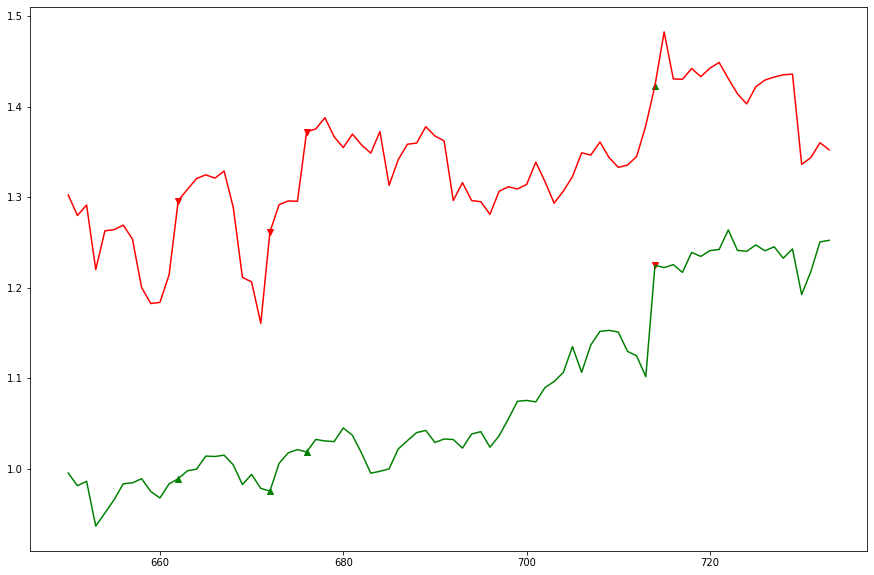

In [ ]:
ix = 7
plt.figure(figsize=(15,10))
plt.plot(t_new[t6.iloc[ix]['original']][650:], color = 'red')
plt.plot(t_new[t6.iloc[ix]['match']][650:], color = 'green')
plt.scatter(stock1_pos_indicators, t_new.iloc[stock1_pos_indicators]['SIEMENS'].values,label='Buy',marker='^',color='green')
plt.scatter(stock2_pos_indicators, t_new.iloc[stock2_pos_indicators]['MANAPPURAM'].values,label='Buy',marker='^',color='green')

plt.scatter(stock2_pos_indicators, t_new.iloc[stock2_pos_indicators]['SIEMENS'].values,label='Sell',marker='v',color='red')
plt.scatter(stock1_pos_indicators, t_new.iloc[stock1_pos_indicators]['MANAPPURAM'].values,label='Sell',marker='v',color='red')


In [ ]:
#stock_indicators = pd.DataFrame({'index':[661,671,675,691,713],'company':['stock1','stock2','stock1','stock2','stock1']})

stock1 bought:  [1.2143445947722358]
stock1 bought:  [1.2143445947722358, 1.1607584460791769]
stock1 bought:  [1.2143445947722358, 1.1607584460791769, 1.295548144623126]
stock2 bought:  [1.032951098721584]
stock1 sold:  [1.362324780235076]
0.4163231552306894
stock2 bought:  [1.032951098721584, 1.1018010449029876]


In [ ]:
profit_final

0.4163231552306894

In [ ]:
for x,y in zip(stock1_pos_indicators, stock2_pos_indicators):
  print(x, y)
  if x<y:
    print("Buying Stock2 and Selling Stock1")
    if len(stock1_shares)>0:
      stock1_profit += stock1[stock1.index == x].values[0] - stock1_shares[0]
    if len(stock2_shares)<10:
      stock2_shares.append(stock2[stock2.index == x].values[0])
  else:
    print("Buying Stock1 and Selling Stock2")
    if len(stock2_shares)>0:
      stock2_profit += stock2[stock2.index == x].values[0] - stock2_shares[0]
    if len(stock1_shares)<10:
      stock1_shares.append(stock1[stock1.index == x].values[0])

[1.2143445947722358, 1.1607584460791769, 1.295548144623126]

In [ ]:
indicators['stook1']

{'stock1': [691, 713], 'stock2': [661, 671, 675]}

In [ ]:
stock2_profit

0

In [ ]:
stock2_pos_indicators

array([661, 671, 675])

In [ ]:
stock2[stock2.index.isin([691, 713])]

691    1.032951
713    1.101801
Name: SIEMENS, dtype: float64

In [ ]:
stock2[stock2.index.isin([661, 671])]

661    0.983323
671    0.978396
Name: SIEMENS, dtype: float64

In [ ]:
stock1[stock1.index.isin([661, 671])]

661    1.214345
671    1.160758
Name: MANAPPURAM, dtype: float64

In [ ]:
stock1[stock1.index.isin([691, 713])]

691    1.362325
713    1.379225
Name: MANAPPURAM, dtype: float64

In [ ]:
stock2_shares

[1.032951098721584, 1.1018010449029876]

In [ ]:
stock2_profit

-0.11589404430535344

In [ ]:
stock1_sell_indicators = stocks_diff[stocks_diff>5].index.values
stock2_buy_indicators = stocks_diff[stocks_diff>5].index.values

array([691, 713])

In [ ]:
##Sell stock1, Buy Stock2 
stock1[stocks_diff[stocks_diff>5].index.values]
stock2[stocks_diff[stocks_diff>5].index.values]


##Buy stock1, Sell Stock2 
stock1[stocks_diff[stocks_diff<-5].index.values]
stock2[stocks_diff[stocks_diff<-5].index.values]

In [ ]:
stock1[stocks_diff[stocks_diff<-5].index.values]


661    1.214345
671    1.160758
675    1.295548
Name: MANAPPURAM, dtype: float64

In [ ]:
stock2[stocks_diff[stocks_diff<-5].index.values]

661    0.983323
671    0.978396
675    1.021241
Name: SIEMENS, dtype: float64

In [ ]:
less than buy 
greater than sell

In [ ]:
stocks_diff[stocks_diff<-5]

661   -5.743694
671   -8.314428
675   -5.844946
dtype: float64

In [ ]:
siemens_pct_chg[siemens_pct_chg.index.isin(man_idx)]

661   -0.583808
671    0.310508
675    0.257681
Name: SIEMENS, dtype: float64

In [ ]:
stock1 = t_new['MANAPPURAM'][650:]
previous1 = stock1.shift(-1).ffill()
pct_change1 = ((stock1 - previous1) / previous1) * 100

In [ ]:
stock2 = t_new['SIEMENS'][650:]
previous2 = stock2.shift(-1).ffill()
pct_change2 = ((stock1 - previous2) / previous2) * 100

In [ ]:
change_pct = abs(pct_change1 - pct_change2)


In [ ]:
change_pct[change_pct>5].shape


(84,)

In [ ]:
stock1 = t_new['MANAPPURAM'][650:]
stock2 = t_new['SIEMENS'][650:]

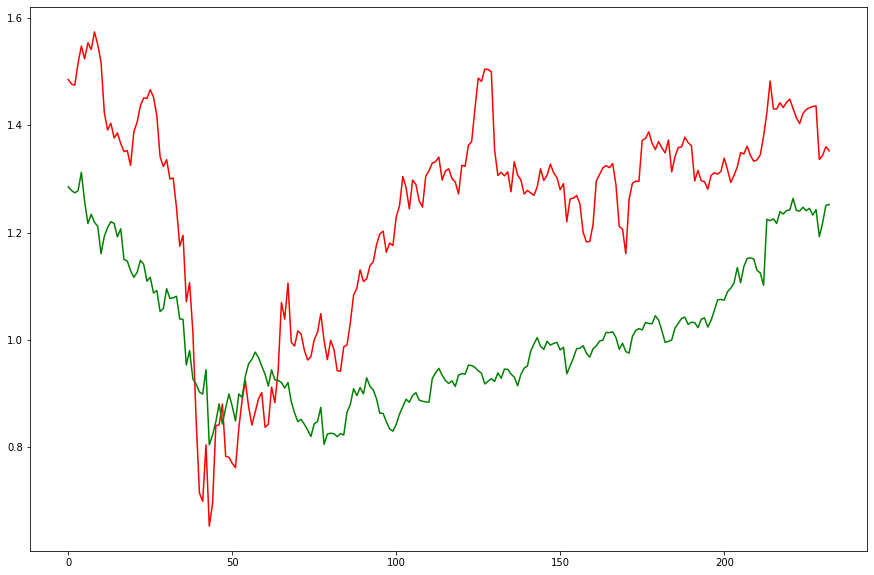

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(t_new['MANAPPURAM'].values.tolist()[501:],color='red')
plt.plot(t_new['SIEMENS'].values.tolist()[501:],color='green')

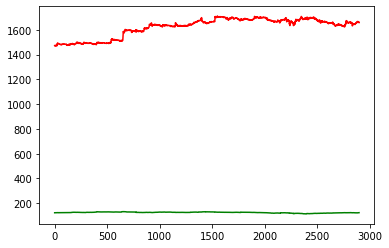

In [ ]:
plt.plot(t['APOLLOHOSP'].values.tolist()[1100:4000],color='red')
plt.plot(t['GAIL'].values.tolist()[1100:4000],color='green')

In [ ]:
tt = lines[lines['company'].str.contains('DIVISLAB|AJANTPHARM')]

In [ ]:
tt.shape

(42935, 11)

In [ ]:
tt['company'].unique()

array(['DIVISLAB', 'AJANTPHARM'], dtype=object)

In [ ]:
tt2= pd.pivot_table(tt,values='close',index='date',columns='company').reset_index()
tt2.head()

company,date,AJANTPHARM,DIVISLAB
0,2019-12-27 09:15:00,954.00,1824.00
1,2019-12-27 09:18:00,956.65,1828.35
2,2019-12-27 09:21:00,958.65,1828.45
3,2019-12-27 09:24:00,957.50,1823.45
4,2019-12-27 09:27:00,958.00,1821.55


In [ ]:
corr = []
for i in range(tt2.shape[0]-1000):
  i+=1001
  corr.append(tt2.iloc[0:(i-1),1:].corr().reset_index().iloc[0,2])

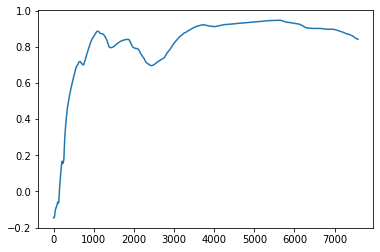

In [ ]:
plt.plot(corr)

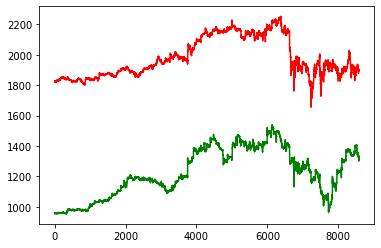

In [ ]:
plt.plot(tt2['DIVISLAB'].values.tolist(), color='red')
plt.plot(tt2['AJANTPHARM'].values.tolist(), color='green')


In [ ]:
def buy_sell(data):

  sigPriceBuy=[]
  sigPricesell=[]
  flag=-1

#============================================================================

  for i in range(len(data)):

    ##Set buy signal criteria
    if ((data['MA30'][i] - data['MA100'][i])/data['MA100'][i]) > 0: 
            
      if flag!=1: 
        sigPriceBuy.append(data['close'][i])
        sigPricesell.append(np.nan)
        flag=1
      else:
         sigPriceBuy.append(np.nan)
         sigPricesell.append(np.nan)
    
     ##Sell signal criteria
    elif data['MA30'][i] < data['MA100'][i]:
      if flag !=0:
          sigPriceBuy.append(np.nan)
          sigPricesell.append(data['close'][i])
          flag=0
      else:
          sigPriceBuy.append(np.nan)
          sigPricesell.append(np.nan)
    else:
          sigPriceBuy.append(np.nan)
          sigPricesell.append(np.nan)


  return (sigPriceBuy,sigPricesell)

buy_sell = buy_sell(lines)
lines['buy_signal_price'] = buy_sell[0]
lines['sell_signal_price'] = buy_sell[1]

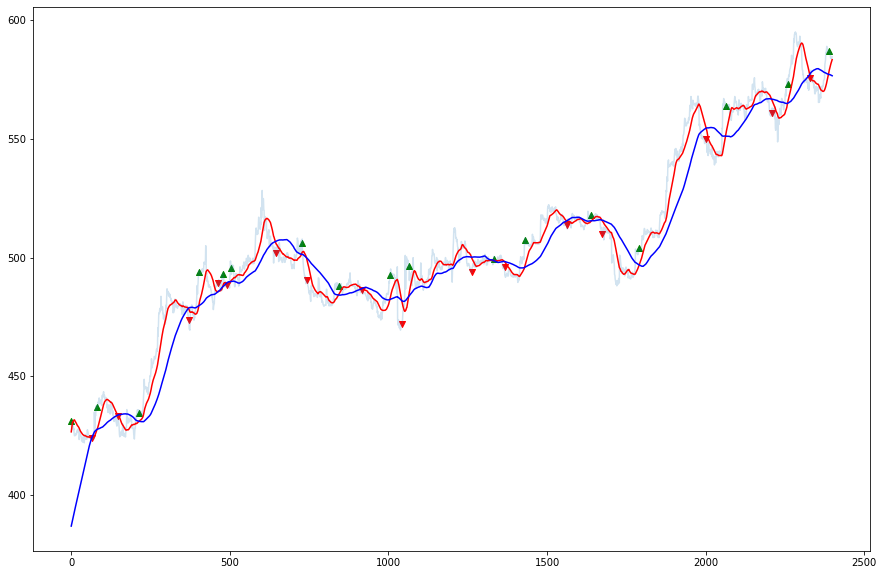

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,10))
plt.plot(lines['close'], label='original', alpha=0.2)
plt.plot(lines['MA30'], label='MA30', color='red')
plt.plot(lines['MA100'], label='MA100', color= 'blue')
plt.scatter(lines.index,lines['buy_signal_price'],label='Buy',marker='^',color='green')
plt.scatter(lines.index,lines['sell_signal_price'],label='Sell',marker='v',color='red')


In [ ]:
buy_index = lines[~lines['buy_signal_price'].isna()].index.values
lines2 = lines.iloc[buy_index[0]:]
sell_index = lines2[~lines2['sell_signal_price'].isna()].index.values
# print(buy_index)
# print(sell_index)
if(len(sell_index)<len(buy_index)):
  lines2 = lines.iloc[buy_index[0]:(sell_index[-1]+1)]
else:
  lines2 = lines.iloc[buy_index[0]:]
lines2.describe()

,Unnamed: 0,open,high,low,close,volume,company_codes,MA30,MA100,buy_signal_price,sell_signal_price
count,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2.330000e+03,2330.0,2330.000000,2330.000000,16.000000,16.000000
mean,1264.500000,502.002897,503.245000,500.845086,502.050944,8.739588e+04,0.0,501.162946,498.222907,495.928125,497.540625
std,672.757386,37.343418,37.399803,37.293224,37.330633,3.510601e+05,0.0,37.090242,37.671975,39.098875,40.331163
min,100.000000,422.000000,423.050000,421.000000,422.000000,2.082000e+03,0.0,424.258333,386.953000,431.000000,424.050000
25%,682.250000,485.462500,487.000000,484.400000,485.500000,2.846325e+04,0.0,485.432500,484.530000,491.537500,483.137500
50%,1264.500000,497.925000,498.900000,496.850000,497.900000,5.147850e+04,0.0,497.653333,497.798000,496.075000,492.325000
75%,1846.750000,516.300000,517.050000,515.600000,516.350000,9.329225e+04,0.0,515.506250,514.712375,506.512500,510.787500
max,2429.000000,595.000000,597.000000,594.100000,595.000000,1.325297e+07,0.0,590.300000,577.304500,573.200000,575.700000


In [ ]:
(lines2['sell_signal_price'].sum() - lines2['buy_signal_price'].sum())/lines2.iloc[0]['close']

0.05986078886310736

In [ ]:
lines2['sell_signal_price'].sum() - lines2['buy_signal_price'].sum()

25.799999999999272

In [ ]:
lines.head()

,Unnamed: 0,date,open,high,low,close,volume,company,company_codes,MA30,MA100,buy_signal_price,sell_signal_price
0,100,2019-09-24 09:15:00,23801.00,24186.40,23710.05,24153.90,4973,PAGEIND,0,23837.535,21179.3075,24153.9,NaN
1,101,2019-09-24 09:30:00,24145.45,24166.75,23504.25,23527.85,2282,PAGEIND,0,23891.790,21221.8590,NaN,NaN
2,102,2019-09-24 09:45:00,23527.85,23800.00,23450.00,23631.90,1568,PAGEIND,0,23946.520,21265.7075,NaN,NaN
3,103,2019-09-24 10:00:00,23636.00,23776.00,23580.00,23633.00,1006,PAGEIND,0,23975.305,21310.5105,NaN,NaN
4,104,2019-09-24 10:15:00,23633.00,23680.00,23605.05,23637.05,363,PAGEIND,0,24005.540,21354.1525,NaN,NaN


In [ ]:
my_data = pd.pivot_table(lines, values='close',index='date',columns='company').reset_index()

In [ ]:
my_data.head(6)

company,date,BATAINDIA,BOSCHLTD,CANBK,CONCOR,DABUR,ITC,OFSS,PVR,VOLTAS,WIPRO
0,2019-09-18 09:15:00,1563.65,13734.80,196.70,525.00,454.90,237.25,2891.05,1594.45,623.15,244.70
1,2019-09-18 09:30:00,1554.15,13658.95,196.30,525.20,455.00,236.65,2895.75,1596.00,622.30,244.20
2,2019-09-18 09:45:00,1556.30,13591.00,195.75,527.50,454.50,236.95,2894.25,1592.00,621.85,243.90
3,2019-09-18 10:00:00,1557.60,13597.05,195.55,525.75,454.80,236.75,2870.00,1591.50,620.50,244.40
4,2019-09-18 10:15:00,1558.50,13714.95,196.35,528.15,456.40,236.70,2866.50,1592.35,626.20,244.55
5,2019-09-18 10:30:00,1555.10,13636.95,196.85,528.25,456.95,236.50,2884.50,1597.60,628.00,244.10


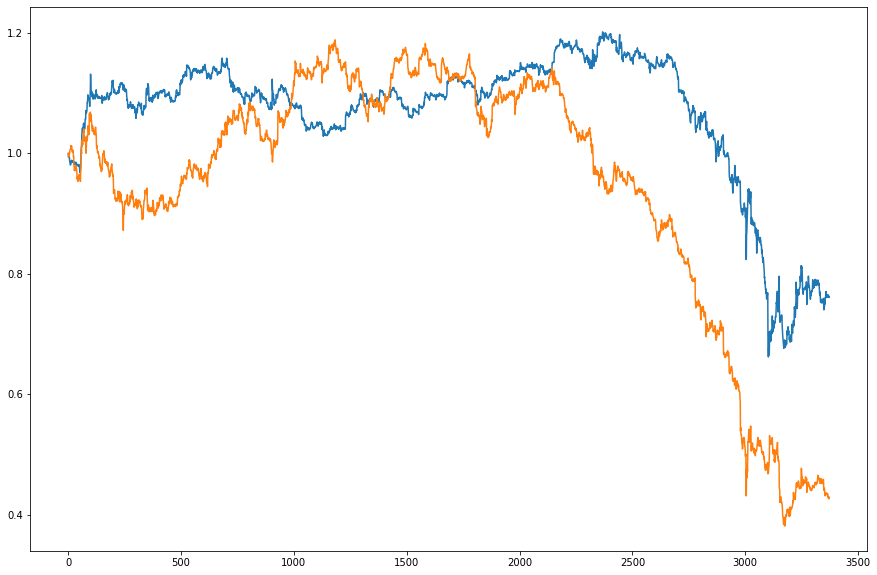

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,10))
company = 'BATAINDIA'
plt.plot(my_data.iloc[:4000][company].rolling(window=1).mean())
plt.plot(my_data.iloc[:4000]['CANBK'].rolling(window=1).mean())

In [ ]:
for i in range(my_data.shape[1]-1):
  my_data.iloc[:,(i+1)] = my_data.iloc[:,(i+1)]/my_data.iloc[0,(i+1)]
  col_names = my_data.columns
  new_col1 = col_names[i+1]+'_prev_index1'
  my_data[new_col1] = my_data[col_names[i+1]].shift()
  new_col2 = col_names[i+1]+'_prev_index2'
  my_data[new_col2] = my_data[col_names[i+1]].shift(2)
  new_col3 = col_names[i+1]+'_prev_index3'
  my_data[new_col3] = my_data[col_names[i+1]].shift(3)
  max_so_far = col_names[i+1]+'_max_stock_value'
  my_data[max_so_far] = my_data[new_col1].cummax()
  percent_off = col_names[i+1]+'_percent_off'
  my_data[percent_off] = (my_data[new_col1]-my_data[max_so_far])/my_data[new_col1]
  mean_acceleration = col_names[i+1]+'_acceleration'
  my_data[mean_acceleration] = my_data[new_col1]/my_data[new_col2] + my_data[new_col2]/my_data[new_col3]
  rolling_max = col_names[i+1]+'_rolling_max'
  my_data[rolling_max] = my_data[col_names[i+1]].rolling(8).max().shift(-7)
  percent_prev1 = col_names[i+1]+'_percent_prev1'
  my_data[percent_off] = (my_data[new_col1]-my_data[max_so_far])/my_data[new_col1]
  percent_off = col_names[i+1]+'_percent_off'
  my_data[percent_off] = (my_data[new_col1]-my_data[max_so_far])/my_data[new_col1]


  target_col = col_names[i+1]+'_target'
  change = ((my_data[rolling_max]-my_data[col_names[i+1]])/my_data[col_names[i+1]])
  my_data[target_col] = np.where(change>0.01,2,np.where(change>0.0005,1,0))


In [ ]:
my_data.fillna(1,inplace=True)
my_data.head(4)

company,date,BATAINDIA,BOSCHLTD,CANBK,CONCOR,DABUR,ITC,OFSS,PVR,VOLTAS,WIPRO,BATAINDIA_prev_index1,BATAINDIA_prev_index2,BATAINDIA_prev_index3,BATAINDIA_max_stock_value,BATAINDIA_percent_off,BATAINDIA_acceleration,BATAINDIA_rolling_max,BATAINDIA_target,BOSCHLTD_prev_index1,BOSCHLTD_prev_index2,BOSCHLTD_prev_index3,BOSCHLTD_max_stock_value,BOSCHLTD_percent_off,BOSCHLTD_acceleration,BOSCHLTD_rolling_max,BOSCHLTD_target,CANBK_prev_index1,CANBK_prev_index2,CANBK_prev_index3,CANBK_max_stock_value,CANBK_percent_off,CANBK_acceleration,CANBK_rolling_max,CANBK_target,CONCOR_prev_index1,CONCOR_prev_index2,CONCOR_prev_index3,CONCOR_max_stock_value,CONCOR_percent_off,...,ITC_prev_index1,ITC_prev_index2,ITC_prev_index3,ITC_max_stock_value,ITC_percent_off,ITC_acceleration,ITC_rolling_max,ITC_target,OFSS_prev_index1,OFSS_prev_index2,OFSS_prev_index3,OFSS_max_stock_value,OFSS_percent_off,OFSS_acceleration,OFSS_rolling_max,OFSS_target,PVR_prev_index1,PVR_prev_index2,PVR_prev_index3,PVR_max_stock_value,PVR_percent_off,PVR_acceleration,PVR_rolling_max,PVR_target,VOLTAS_prev_index1,VOLTAS_prev_index2,VOLTAS_prev_index3,VOLTAS_max_stock_value,VOLTAS_percent_off,VOLTAS_acceleration,VOLTAS_rolling_max,VOLTAS_target,WIPRO_prev_index1,WIPRO_prev_index2,WIPRO_prev_index3,WIPRO_max_stock_value,WIPRO_percent_off,WIPRO_acceleration,WIPRO_rolling_max,WIPRO_target
0,2019-09-18 09:15:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.004575,1,1.000000,1.000000,1.0,1.000000,1.0,...,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.001626,1,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.004108,1,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.007783,1,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,0
1,2019-09-18 09:30:00,0.993924,0.994478,0.997966,1.000381,1.000220,0.997471,1.001626,1.000972,0.998636,0.997957,1.000000,1.000000,1.0,1.0,0.000000,1.000000,0.996706,1,1.000000,1.000000,1.0,1.0,0.000000,1.000000,0.998555,1,1.000000,1.000000,1.0,1.0,0.000000,1.000000,1.006101,1,1.000000,1.000000,1.0,1.000000,0.0,...,1.000000,1.000000,1.0,1.0,0.000000,1.000000,0.998736,1,1.000000,1.000000,1.0,1.000000,0.000000,1.000000,1.001626,0,1.000000,1.000000,1.0,1.000000,0.000000,1.000000,1.004108,1,1.000000,1.000000,1.0,1.0,0.000000,1.000000,1.008104,1,1.000000,1.000000,1.0,1.0,0.000000,1.000000,1.000409,1
2,2019-09-18 09:45:00,0.995299,0.989530,0.995170,1.004762,0.999121,0.998736,1.001107,0.998463,0.997914,0.996731,0.993924,1.000000,1.0,1.0,-0.006113,1.000000,0.996706,1,0.994478,1.000000,1.0,1.0,-0.005553,1.000000,0.998555,1,0.997966,1.000000,1.0,1.0,-0.002038,1.000000,1.007372,2,1.000381,1.000000,1.0,1.000381,0.0,...,0.997471,1.000000,1.0,1.0,-0.002535,1.000000,0.998736,0,1.001626,1.000000,1.0,1.001626,0.000000,1.000000,1.001107,0,1.000972,1.000000,1.0,1.000972,0.000000,1.000000,1.004547,1,0.998636,1.000000,1.0,1.0,-0.001366,1.000000,1.008104,2,0.997957,1.000000,1.0,1.0,-0.002048,1.000000,1.000409,1
3,2019-09-18 10:00:00,0.996131,0.989971,0.994154,1.001429,0.999780,0.997893,0.992719,0.998150,0.995747,0.998774,0.995299,0.993924,1.0,1.0,-0.004723,1.995308,0.996706,1,0.989530,0.994478,1.0,1.0,-0.010581,1.989503,0.998555,1,0.995170,0.997966,1.0,1.0,-0.004853,1.995165,1.007372,2,1.004762,1.000381,1.0,1.004762,0.0,...,0.998736,0.997471,1.0,1.0,-0.001266,1.998739,0.997893,0,1.001107,1.001626,1.0,1.001626,-0.000518,2.001108,1.004497,2,0.998463,1.000972,1.0,1.000972,-0.002513,1.998466,1.005864,1,0.997914,0.998636,1.0,1.0,-0.002091,1.997913,1.008264,2,0.996731,0.997957,1.0,1.0,-0.003280,1.996728,1.001839,1


In [ ]:
prev_index_cols = [col for col in my_data.columns if '_prev_index1' in col]

In [ ]:
my_data['prev_index_mean_across'] = my_data[prev_index_cols].mean(axis=1)

In [ ]:
my_data.head(3)

company,date,BATAINDIA,BOSCHLTD,CANBK,CONCOR,DABUR,ITC,OFSS,PVR,VOLTAS,WIPRO,BATAINDIA_prev_index1,BATAINDIA_prev_index2,BATAINDIA_prev_index3,BATAINDIA_max_stock_value,BATAINDIA_percent_off,BATAINDIA_acceleration,BATAINDIA_rolling_max,BATAINDIA_target,BOSCHLTD_prev_index1,BOSCHLTD_prev_index2,BOSCHLTD_prev_index3,BOSCHLTD_max_stock_value,BOSCHLTD_percent_off,BOSCHLTD_acceleration,BOSCHLTD_rolling_max,BOSCHLTD_target,CANBK_prev_index1,CANBK_prev_index2,CANBK_prev_index3,CANBK_max_stock_value,CANBK_percent_off,CANBK_acceleration,CANBK_rolling_max,CANBK_target,CONCOR_prev_index1,CONCOR_prev_index2,CONCOR_prev_index3,CONCOR_max_stock_value,CONCOR_percent_off,...,ITC_prev_index2,ITC_prev_index3,ITC_max_stock_value,ITC_percent_off,ITC_acceleration,ITC_rolling_max,ITC_target,OFSS_prev_index1,OFSS_prev_index2,OFSS_prev_index3,OFSS_max_stock_value,OFSS_percent_off,OFSS_acceleration,OFSS_rolling_max,OFSS_target,PVR_prev_index1,PVR_prev_index2,PVR_prev_index3,PVR_max_stock_value,PVR_percent_off,PVR_acceleration,PVR_rolling_max,PVR_target,VOLTAS_prev_index1,VOLTAS_prev_index2,VOLTAS_prev_index3,VOLTAS_max_stock_value,VOLTAS_percent_off,VOLTAS_acceleration,VOLTAS_rolling_max,VOLTAS_target,WIPRO_prev_index1,WIPRO_prev_index2,WIPRO_prev_index3,WIPRO_max_stock_value,WIPRO_percent_off,WIPRO_acceleration,WIPRO_rolling_max,WIPRO_target,prev_index_mean_across
0,2019-09-18 09:15:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.0,1.000000,0,1.000000,1.0,1.0,1.0,1.000000,1.0,1.000000,0,1.000000,1.0,1.0,1.0,1.000000,1.0,1.004575,1,1.000000,1.0,1.0,1.000000,1.0,...,1.0,1.0,1.0,1.000000,1.0,1.000000,0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.001626,1,1.000000,1.0,1.0,1.000000,1.0,1.0,1.004108,1,1.000000,1.0,1.0,1.0,1.000000,1.0,1.007783,1,1.000000,1.0,1.0,1.0,1.000000,1.0,1.000000,0,1.000000
1,2019-09-18 09:30:00,0.993924,0.994478,0.997966,1.000381,1.000220,0.997471,1.001626,1.000972,0.998636,0.997957,1.000000,1.0,1.0,1.0,0.000000,1.0,0.996706,1,1.000000,1.0,1.0,1.0,0.000000,1.0,0.998555,1,1.000000,1.0,1.0,1.0,0.000000,1.0,1.006101,1,1.000000,1.0,1.0,1.000000,0.0,...,1.0,1.0,1.0,0.000000,1.0,0.998736,1,1.000000,1.0,1.0,1.000000,0.0,1.0,1.001626,0,1.000000,1.0,1.0,1.000000,0.0,1.0,1.004108,1,1.000000,1.0,1.0,1.0,0.000000,1.0,1.008104,1,1.000000,1.0,1.0,1.0,0.000000,1.0,1.000409,1,1.000000
2,2019-09-18 09:45:00,0.995299,0.989530,0.995170,1.004762,0.999121,0.998736,1.001107,0.998463,0.997914,0.996731,0.993924,1.0,1.0,1.0,-0.006113,1.0,0.996706,1,0.994478,1.0,1.0,1.0,-0.005553,1.0,0.998555,1,0.997966,1.0,1.0,1.0,-0.002038,1.0,1.007372,2,1.000381,1.0,1.0,1.000381,0.0,...,1.0,1.0,1.0,-0.002535,1.0,0.998736,0,1.001626,1.0,1.0,1.001626,0.0,1.0,1.001107,0,1.000972,1.0,1.0,1.000972,0.0,1.0,1.004547,1,0.998636,1.0,1.0,1.0,-0.001366,1.0,1.008104,2,0.997957,1.0,1.0,1.0,-0.002048,1.0,1.000409,1,0.998363


In [ ]:
train_cols = ['date']+[col for col in my_data.columns if 'prev_index' in col]+[col for col in my_data.columns if 'max_stock_value' in col]\
+ [col for col in my_data.columns if 'rolling_max' in col] + [col for col in my_data.columns if '_acceleration' in col]\
+ [col for col in my_data.columns if 'percent_off' in col]

In [ ]:
target_cols = ['date']+[col for col in my_data.columns if 'target' in col]

In [ ]:
target_cols

['date',
 'BATAINDIA_target',
 'BOSCHLTD_target',
 'CANBK_target',
 'CONCOR_target',
 'DABUR_target',
 'ITC_target',
 'OFSS_target',
 'PVR_target',
 'VOLTAS_target',
 'WIPRO_target']

In [ ]:
df = pd.DataFrame()
for col in target_cols[1:]:
  t = my_data[[col,'date']]
  t.columns = ['target','date']
  t['name'] = col
  df = pd.concat([df,t],axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df.shape, df.head()

((33730, 3),    target                date              name
 0       0 2019-09-18 09:15:00  BATAINDIA_target
 1       1 2019-09-18 09:30:00  BATAINDIA_target
 2       1 2019-09-18 09:45:00  BATAINDIA_target
 3       1 2019-09-18 10:00:00  BATAINDIA_target
 4       0 2019-09-18 10:15:00  BATAINDIA_target)

In [ ]:
my_data.shape

(3373, 92)

In [ ]:
my_data2 = pd.merge(df, my_data[train_cols],on='date')
my_data.shape, my_data2.shape

((3373, 92), (33730, 74))

In [ ]:
my_data_train = my_data2[my_data2['date'].dt.date<pd.to_datetime('2020-01-01')]
my_data_train.shape

(17290, 74)

In [ ]:
my_data_test = my_data2[(my_data2['date'].dt.date>=pd.to_datetime('2020-01-01')) & 
                       (my_data2['date'].dt.date<pd.to_datetime('2020-02-01'))]
my_data_test.shape

(5750, 74)

In [ ]:
final_cols = [col for col in my_data.columns if (('prev_index' in col) | ('max_stock_value' in col)
| ('percent_off' in col) | ('acceleration' in col)) | ('name' in col)]

In [ ]:
target_col = 'target'

In [ ]:
my_data_train[target_col].value_counts()

1    10022
0     4802
2     2466
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(my_data2[final_cols], 
                                                    my_data2[target_col], test_size=0.33, random_state=42)

In [ ]:
X_train  = my_data_train[final_cols]
X_test  = my_data_test[final_cols]
y_train = my_data_train[target_col]
y_test = my_data_test[target_col]


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=5,min_child_weight=100, learning_rate=0.01)
model.fit(np.array(X_train), np.array(y_train))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=100, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_train.value_counts()

1    10022
0     4802
2     2466
Name: target, dtype: int64

In [ ]:
pred = model.predict_proba(np.array(X_test))
# pred[:,1] = pred[:,1]*y_train.value_counts()[0]/y_train.value_counts()[1]
# pred[:,2] = pred[:,2]*y_train.value_counts()[0]/y_train.value_counts()[2]

In [ ]:
y_pred = np.argmax(pred,axis=1)
#y_pred = model.predict(np.array(X_test))
#y_pred2 = np.where(y_pred[:,1]>0.1,1,0)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[   0, 1678,    0],
       [   0, 3470,    0],
       [   0,  602,    0]])

In [ ]:
X_test.columns

Index(['BATAINDIA_prev_index1', 'BATAINDIA_prev_index2',
       'BATAINDIA_prev_index3', 'BATAINDIA_max_stock_value',
       'BATAINDIA_percent_off', 'BATAINDIA_acceleration',
       'BOSCHLTD_prev_index1', 'BOSCHLTD_prev_index2', 'BOSCHLTD_prev_index3',
       'BOSCHLTD_max_stock_value', 'BOSCHLTD_percent_off',
       'BOSCHLTD_acceleration', 'CANBK_prev_index1', 'CANBK_prev_index2',
       'CANBK_prev_index3', 'CANBK_max_stock_value', 'CANBK_percent_off',
       'CANBK_acceleration', 'CONCOR_prev_index1', 'CONCOR_prev_index2',
       'CONCOR_prev_index3', 'CONCOR_max_stock_value', 'CONCOR_percent_off',
       'CONCOR_acceleration', 'DABUR_prev_index1', 'DABUR_prev_index2',
       'DABUR_prev_index3', 'DABUR_max_stock_value', 'DABUR_percent_off',
       'DABUR_acceleration', 'ITC_prev_index1', 'ITC_prev_index2',
       'ITC_prev_index3', 'ITC_max_stock_value', 'ITC_percent_off',
       'ITC_acceleration', 'OFSS_prev_index1', 'OFSS_prev_index2',
       'OFSS_prev_index3', 'OFSS_max_sto

In [ ]:
my_data_test.loc[(my_data_test['name']=='BAJFINANCE_target') & (y_pred==2),['BAJFINANCE_prev_index1','target','date','name']]

,BAJFINANCE_prev_index1,target,date,name
17320,1.232010,1,2020-01-01 10:00:00,BAJFINANCE_target
17330,1.230631,0,2020-01-01 10:15:00,BAJFINANCE_target
17340,1.232083,0,2020-01-01 10:30:00,BAJFINANCE_target
17360,1.231212,1,2020-01-01 11:00:00,BAJFINANCE_target
17370,1.230050,0,2020-01-01 11:15:00,BAJFINANCE_target
...,...,...,...,...
22990,1.277974,1,2020-01-31 14:15:00,BAJFINANCE_target
23000,1.275026,1,2020-01-31 14:30:00,BAJFINANCE_target
23010,1.275636,2,2020-01-31 14:45:00,BAJFINANCE_target
23020,1.273603,2,2020-01-31 15:00:00,BAJFINANCE_target


In [ ]:
company_list = my_data.columns[1:11]
company_list

Index(['BATAINDIA', 'BOSCHLTD', 'CANBK', 'CONCOR', 'DABUR', 'ITC', 'OFSS',
       'PVR', 'VOLTAS', 'WIPRO'],
      dtype='object', name='company')

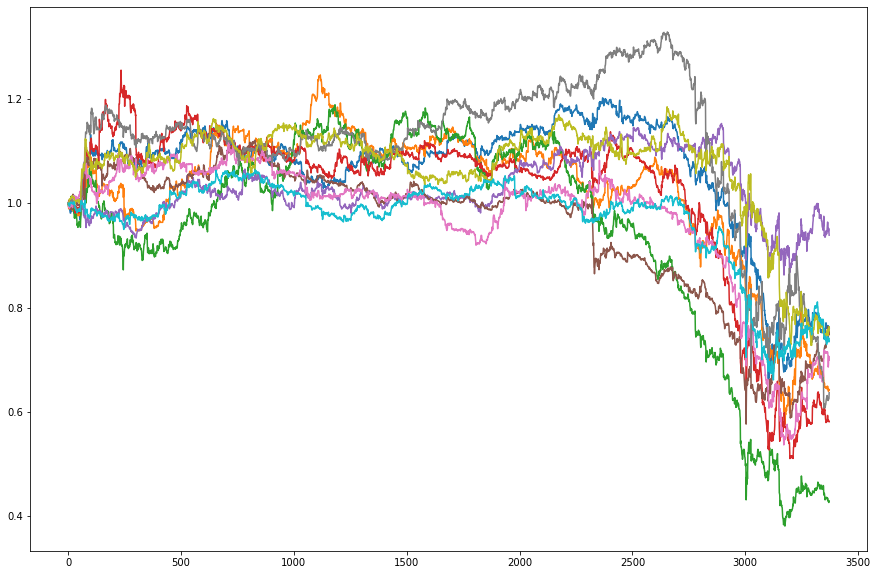

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,10))
for company in company_list:
#plt.plot(lines.iloc[:1000]['close'])
  plt.plot(my_data.iloc[:4000][company].rolling(window=1).mean())
  #plt.legend()


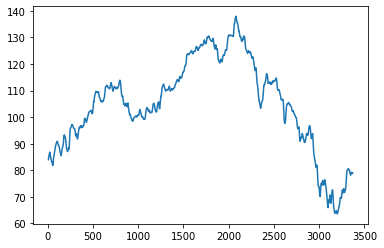

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.plot(lines.iloc[:1000]['close'])
plt.plot(lines.iloc[:4000]['close'].rolling(window=10).mean())

In [ ]:
lines['date2'] = lines['date'].dt.date
lines.head()

,Unnamed: 0,date,open,high,low,close,volume,company,company_codes,date2
0,0,2019-09-18 09:15:00,563.80,565.10,558.80,562.50,39135,CUMMINSIND,3,2019-09-18
1,1,2019-09-18 09:30:00,562.50,563.25,561.00,562.45,15019,CUMMINSIND,3,2019-09-18
2,2,2019-09-18 09:45:00,562.45,565.85,560.50,564.00,80629,CUMMINSIND,3,2019-09-18
3,3,2019-09-18 10:00:00,564.00,564.45,562.25,563.60,5062,CUMMINSIND,3,2019-09-18
4,4,2019-09-18 10:15:00,563.60,567.00,563.50,565.90,23618,CUMMINSIND,3,2019-09-18


In [ ]:
open = lines.groupby(['company','date2'])["open"].first().reset_index()
open.head()

,company,date2,open
0,CASTROLIND,2019-09-18,125.15
1,CASTROLIND,2019-09-19,125.00
2,CASTROLIND,2019-09-20,123.00
3,CASTROLIND,2019-09-23,131.40
4,CASTROLIND,2019-09-24,134.10


In [ ]:
open.columns = ['company','date2','start']

In [ ]:
lines.shape, pd.merge(lines, open, on='date2').shape

((67460, 10), (1349200, 12))

In [ ]:
lines = pd.merge(lines, open, on=['company','date2'])

In [ ]:
lines.head()

,Unnamed: 0,date,open,high,low,close,volume,company,company_codes,date2,start
0,0,2019-09-18 09:15:00,563.80,565.10,558.80,562.50,39135,CUMMINSIND,3,2019-09-18,563.8
1,1,2019-09-18 09:30:00,562.50,563.25,561.00,562.45,15019,CUMMINSIND,3,2019-09-18,563.8
2,2,2019-09-18 09:45:00,562.45,565.85,560.50,564.00,80629,CUMMINSIND,3,2019-09-18,563.8
3,3,2019-09-18 10:00:00,564.00,564.45,562.25,563.60,5062,CUMMINSIND,3,2019-09-18,563.8
4,4,2019-09-18 10:15:00,563.60,567.00,563.50,565.90,23618,CUMMINSIND,3,2019-09-18,563.8


In [ ]:
lines.shape

(67460, 11)

In [ ]:
def formatPrice(n):
    return("-Rs." if n<0 else "Rs.")+"{0:.2f}".format(abs(n))
def getStockDataVec(key):
    vec = []
    vol = []
    company = []
    index = []
    start = []
    lines2 = lines[lines['company']==key]
    for i in range(lines2.shape[0]-10):
      i+=10
      vec.append(lines2.iloc[i]['close'])
      vol.append(lines2.iloc[i]['volume'])
      company.append(lines2.iloc[i]['company_codes'])
      #index.append(lines2.iloc[i]['index'])
      start.append(lines2.iloc[i]['start'])
        #print(vec)
    return vec, vol, company, start
def sigmoid(x):
    #return 1/(1+math.exp(-x))
    return x
def getState(data, t, n):
    d = t - n
    block = data[d:(t + 1)] if d >= 0 else -d * [data[0]] + data[0:(t + 1)] # pad with t0
    big_block = [x for ix, x in enumerate(data[(t-100):(t+1)]) if company[ix]==company[t]]
    #overall_block = np.array([x for ix, x in enumerate(data[(t-3):(t+1)]) if index[ix]<=index[t]] )

    #print(block)
    res = []
    for i in range(n - 1):
        res.append(sigmoid(block[i + 1] - block[i]))
    vec_stats = []
    #print('mean: ',np.mean(block))
    vec_stats.append(np.mean(block))
    vec_stats.append(np.min(block))
    vec_stats.append(np.max(block))
    vec_stats.append(block[-1])
    vec_stats.append(np.mean(big_block))
    vec_stats.extend(block)
    #vec_stats.append(np.mean(overall_block))
    target = (np.where(((data[t+1]-data[t])/data[t])>0.005,2,np.where((data[t+1]-data[t])<0,0,1))).tolist()
    return np.array(vec_stats), target

In [ ]:
import sys

window_size = 3
episode_count = 2
window_size = int(window_size)
episode_count = int(episode_count)
#agent = Agent(window_size)

batch_size = 32

In [ ]:
import keras
from keras.utils import to_categorical

In [ ]:
input = []
output = []

for ix,name in enumerate(all_companies):
    print('Done with: ',str(ix), 'out of: ',str(len(all_companies)))
    stock_name = name
    stock_name = str(stock_name)
    data, volume, company, start = getStockDataVec(stock_name)
    l = len(data) - 1
    for t in range(l-10):
        t+=10
        next_state, target = getState(data, t, window_size + 1)
        target = (np.where(((data[t+1]-data[t])/data[t])>0.005,2,np.where((data[t+1]-data[t])<0,0,1))).tolist()
        input.append(list(next_state/next_state[1]) + list(next_state/start[t])
        #+list(volume[(t-3):(t+1)])
        +list(to_categorical([company[t]],num_classes=len(all_companies))[0])
        +[data[t]]
        +[np.mean(data[(t-100):t])]
        +list(volume[(t-3):t]))
        output.append(target)

Done with:  0 out of:  20


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Done with:  1 out of:  20
Done with:  2 out of:  20
Done with:  3 out of:  20
Done with:  4 out of:  20
Done with:  5 out of:  20
Done with:  6 out of:  20
Done with:  7 out of:  20
Done with:  8 out of:  20
Done with:  9 out of:  20
Done with:  10 out of:  20
Done with:  11 out of:  20
Done with:  12 out of:  20
Done with:  13 out of:  20
Done with:  14 out of:  20
Done with:  15 out of:  20
Done with:  16 out of:  20
Done with:  17 out of:  20
Done with:  18 out of:  20
Done with:  19 out of:  20


In [ ]:
output2 = []
for i in output:
  output2.append(np.where(i>1,1,0))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.33, random_state=42)

In [ ]:
pd.DataFrame(y_test).value_counts()

0    10797
1     9282
2     2045
dtype: int64

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=5,min_child_weight=50,scale_pos_weight=1)
model.fit(np.array(X_train), np.array(y_train))
model.feature_importances_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=50, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

array([0.02177791, 0.        , 0.13506474, 0.0324027 , 0.02320497,
       0.01447307, 0.01463   , 0.01533777, 0.0150102 , 0.        ,
       0.01764262, 0.02062419, 0.01688755, 0.01763482, 0.01832274,
       0.01979751, 0.01415565, 0.01678342, 0.01639315, 0.        ,
       0.01353713, 0.018455  , 0.00790779, 0.01310325, 0.01990064,
       0.01517743, 0.01769356, 0.02500281, 0.01621412, 0.01789831,
       0.        , 0.01916032, 0.01344518, 0.0167679 , 0.03849858,
       0.15701151, 0.00809015, 0.01109293, 0.01603065, 0.02012424,
       0.03509156, 0.02016187, 0.01470137, 0.01474462, 0.02004601],
      dtype=float32)

In [ ]:
y_pred = model.predict(np.array(X_test))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[7862, 2854,   81],
       [5988, 3260,   34],
       [1582,  381,   82]])

In [ ]:
56/88

0.6363636363636364

In [ ]:
y_pred2 = model.predict_proba(np.array(X_test))

In [ ]:
y_pred3 = np.where(y_pred2[:,2]>0.3,2,0)

In [ ]:
confusion_matrix(y_test,y_pred3)

array([[ 9564,     0,   229],
       [10000,     0,   117],
       [ 1954,     0,   185]])

In [ ]:
getState(data, 2, window_size + 1)

array([2000.5625, 1985.35  , 2008.45  , 1985.35  ])

In [ ]:
  for e in range(episode_count + 1):
    print("Episode " + str(e) + "/" + str(episode_count))
    state = getState(data, 0, window_size + 1)
    total_profit = 0
    agent.inventory = []
    buy_counter = 0
    for t in range(l):
        action = agent.act(state)
        # sit
        next_state = getState(data, t + 1, window_size + 1)
        reward = 0
        #print('action: ',action)

        if action == 1: # buy
            buy_counter+=1
            agent.inventory.append(data[t])
            print("buy_counter: " + str(t) + " Buy: " + formatPrice(data[t]))
        elif action == 2 and len(agent.inventory) > 0: # sell
            buy_counter-=1
            bought_price = window_size_price = np.mean(agent.inventory)
            agent.inventory = list(np.array(agent.inventory)-np.mean(agent.inventory)/buy_counter)
            #reward = max(data[t] - bought_price, 0)
            reward = data[t] - bought_price
            total_profit += reward
            print("l: " + str(t) + " Bought: " + formatPrice(bought_price) + "Sell: " + formatPrice(data[t]) + " | Profit: " + formatPrice(data[t] - bought_price))
        done = True if t == l - 1 else False
        agent.memory.append((state, action, reward, next_state, done))
        state = next_state
        if done:
            print("--------------------------------")
            print("Total Profit: " + formatPrice(total_profit))
            print("--------------------------------")
        if len(agent.memory) > batch_size:
            print('training model')
            agent.expReplay(batch_size)
    if e % 10 == 0:
        agent.model.save(str(e))

Episode 0/2
buy_counter: 2 Buy: Rs.1985.35
buy_counter: 3 Buy: Rs.1990.50
l: 4 Bought: Rs.1987.92Sell: Rs.1995.00 | Profit: Rs.7.08
l: 6 Bought: Rs.0.00Sell: Rs.1994.00 | Profit: Rs.1994.00
buy_counter: 7 Buy: Rs.1993.20
l: 9 Bought: Rs.nanSell: Rs.1998.00 | Profit: Rs.nan
buy_counter: 10 Buy: Rs.1996.80
l: 11 Bought: Rs.nanSell: Rs.1995.10 | Profit: Rs.nan
l: 12 Bought: Rs.nanSell: Rs.1998.55 | Profit: Rs.nan
l: 15 Bought: Rs.nanSell: Rs.1995.80 | Profit: Rs.nan
l: 18 Bought: Rs.nanSell: Rs.1989.55 | Profit: Rs.nan
buy_counter: 19 Buy: Rs.1989.60
l: 20 Bought: Rs.nanSell: Rs.1989.80 | Profit: Rs.nan
l: 22 Bought: Rs.nanSell: Rs.1985.00 | Profit: Rs.nan
buy_counter: 23 Buy: Rs.1988.55
buy_counter: 24 Buy: Rs.1988.85
buy_counter: 25 Buy: Rs.1992.70
l: 26 Bought: Rs.nanSell: Rs.1992.00 | Profit: Rs.nan
l: 28 Bought: Rs.nanSell: Rs.1984.55 | Profit: Rs.nan
l: 30 Bought: Rs.nanSell: Rs.1979.00 | Profit: Rs.nan
l: 32 Bought: Rs.nanSell: Rs.1988.50 | Profit: Rs.nan
training model


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


training model
training model
training model
l: 36 Bought: Rs.nanSell: Rs.1989.95 | Profit: Rs.nan
training model
l: 37 Bought: Rs.nanSell: Rs.1990.50 | Profit: Rs.nan
training model
l: 38 Bought: Rs.nanSell: Rs.1988.55 | Profit: Rs.nan
training model


KeyboardInterrupt: ignored

In [ ]:
stock_name = input("Enter Stock_name, Model_name")
model_name = input()
model = load_model('/content/0/')
window_size = model.layers[0].input.shape.as_list()[1]
agent = Agent(window_size, True, model_name)
data = getStockDataVec(stock_name)
print(data)
l = len(data) - 1
batch_size = 32
state = getState(data, 0, window_size + 1)
print(state)
total_profit = 0
agent.inventory = []
print(l)
for t in range(l):
    action = agent.act(state)
    print(action)
    # sit
    next_state = getState(data, t + 1, window_size + 1)
    reward = 0
    if action == 1: # buy
        agent.inventory.append(data[t])
        print("Buy: " + formatPrice(data[t]))
    elif action == 2 and len(agent.inventory) > 0: # sell
        bought_price = agent.inventory.pop(0)
        reward = max(data[t] - bought_price, 0)
        total_profit += data[t] - bought_price
        print("Sell: " + formatPrice(data[t]) + " | Profit: " + formatPrice(data[t] - bought_price))
    done = True if t == l - 1 else False
    agent.memory.append((state, action, reward, next_state, done))
    state = next_state
    if done:
        print("--------------------------------")
        print(stock_name + " Total Profit: " + formatPrice(total_profit))
        print("--------------------------------")
        print ("Total profit is:",formatPrice(total_profit))